In [1]:
import sys
import os, os.path
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.stats import kde
import pandas as pd
import math

i = 0
myfile = pd.read_csv('/home/smu/Carlos/BH261_1_ccd2/FITS_FILES/Red_Clump/plz.csv', delimiter = ',')

spec_name = myfile['Spectra_name']
FeH_SPACE = myfile['Fe']
Fe_Ph = myfile['feh']
snr = myfile['S/N']
conv = myfile['conv']
temp = myfile['Teff']
logg = myfile['logg']

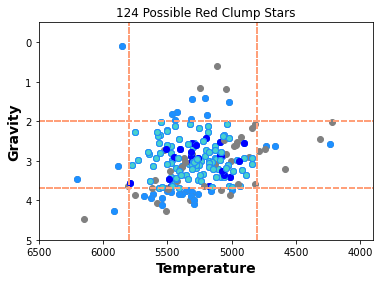

In [4]:
k = 0
for i in range(0, len(myfile)):
    scatter = plt.scatter(temp[i], logg[i], color = 'grey')
    plt.xlabel('Temperature', fontsize = 14, fontweight = "bold")
    plt.ylabel('Gravity', fontsize = 14, fontweight = "bold")
    plt.xlim(3900, 6500)
    plt.ylim(-0.5,5)
    ax = scatter.axes
    ax.invert_xaxis()
    ax.invert_yaxis()
    plt.title(str(k) + ' Possible Red Clump Stars')
    plt.axvline(4800, linestyle = '--', color = 'lightsalmon')
    plt.axvline(5800, linestyle = '--', color = 'lightsalmon')
    plt.axhline(2.0, linestyle = '--', color = 'lightsalmon')
    plt.axhline(3.7, linestyle = '--', color = 'lightsalmon')

    if abs(FeH_SPACE[i] - Fe_Ph[i]) < 0.35:
        plt.scatter(temp[i], logg[i], color = 'dodgerblue')
        if (4800 < temp[i] < 5800) & (2.0 < logg[i] < 3.7):
            plt.scatter(temp[i], logg[i], color = 'mediumturquoise', edgecolor = 'dodgerblue') 
            if (4800 < temp[i] < 5800) & (2.0 < logg[i] < 3.7):
                k = k + 1
            if snr[i] > 45:
                plt.scatter(temp[i], logg[i], color = 'blue')       
plt.savefig('GvT.jpg')

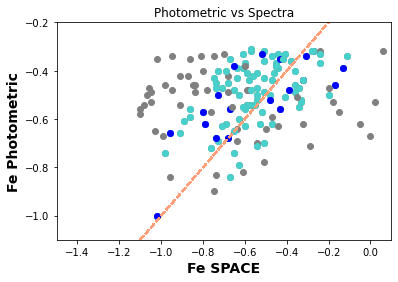

In [5]:
x = [-1.1,-0.7,-0.5,-0.3,-0.15]
y =[-1.1,-0.7,-0.5,-0.3,-0.15]

for i in range(0,len(myfile)):
    if conv[i] < 1:
        plt.scatter(FeH_SPACE[i], Fe_Ph[i], color = 'grey')
        plt.plot(x,y, color = 'lightsalmon', linestyle = '--')
        plt.xlim(-1.5,0.1)
        plt.ylim(-1.5,0.1)
        plt.title('Photometric vs Spectra')
        plt.xlabel('Fe SPACE', fontsize = 14, fontweight = "bold")
        plt.ylabel('Fe Photometric', fontsize = 14, fontweight = "bold")
        plt.ylim(-1.1,-0.2)
        if abs(FeH_SPACE[i] - Fe_Ph[i]) < 0.35:
            #plt.scatter(FeH_SPACE[i], Fe_Ph[i], color = 'dodgerblue' )
            if (4800 < temp[i] < 5800) & (2.0 < logg[i] < 3.7):
                #print('')
                plt.scatter(FeH_SPACE[i], Fe_Ph[i], color = 'mediumturquoise')
                plt.errorbar
                if snr[i] > 45:
                    plt.scatter(FeH_SPACE[i], Fe_Ph[i], color = 'blue')
#print(j)
plt.savefig('SvP.jpg')

0.10396984924623115 0.2748024765190123


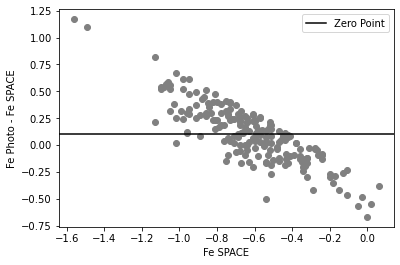

In [4]:
FeDiff=[]
FeTrue=[]


for i in range(0,len(myfile)):
    FeDiff.append(Fe_Ph[i] - FeH_SPACE[i])
    
    Fe_avgdiff = np.mean(FeDiff)
    Fe_avediffstd = np.std(FeDiff)
        

print(Fe_avgdiff, Fe_avediffstd)

plt.plot(FeH_SPACE, FeDiff, ".", markersize=12, color = 'grey')
plt.axhline(Fe_avgdiff, color = 'black', label = 'Zero Point')
plt.ylabel('Fe Photo - Fe SPACE')
plt.xlabel('Fe SPACE')
plt.legend()


    